## Teste das bibliotecas de Clustering de Time-Series

In [1]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import clustering
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

In [2]:
date_first_case = '2020-03-01'
today = str(datetime.today().strftime('%Y-%m-%d'))
df = pd.read_csv("../datasets/obito_cartorio.csv")
df = df.filter(["date", "state", "deaths_covid19", "new_deaths_covid19"]).fillna(0)
df = df.sort_values(by=['date','state'])
df = df.loc[(df['date'] >= date_first_case) & (df['date'] <= today)]
obito_cartorio_pd = df

In [3]:
def unique(list1): 
    unique_list = dict()
    for x in list1: 
        unique_list[x] = x
    return sorted(list(unique_list.keys()))
state_list = unique(list(np.array(obito_cartorio_pd["state"])))
print("state_list: ", len(state_list), state_list)

state_list:  27 ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [4]:
states_norm = dict()
for state in state_list:
    data = np.array(obito_cartorio_pd.loc[obito_cartorio_pd['state'] == state]["new_deaths_covid19"])
    max_val = max(data)
    states_norm[state] = data / max_val

In [5]:
clustering_array_np = np.array(list(states_norm.values()), dtype=np.double)
clustering_array_np.shape

(27, 94)

In [6]:
# imprimir array sem notação científica
np.set_printoptions(suppress=True)

In [7]:
# SciPy linkage clustering
model1 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx1 = model1.fit(clustering_array_np)

In [21]:
model1.linkage

array([[ 5.        , 18.        ,  0.33563707,  2.        ],
       [25.        , 27.        ,  0.37842906,  3.        ],
       [15.        , 28.        ,  0.46588701,  4.        ],
       [ 2.        , 29.        ,  0.67415948,  5.        ],
       [ 4.        ,  7.        ,  0.68244037,  2.        ],
       [ 1.        , 14.        ,  0.703789  ,  2.        ],
       [17.        , 32.        ,  0.78640167,  3.        ],
       [20.        , 21.        ,  0.80140183,  2.        ],
       [22.        , 33.        ,  0.87831923,  4.        ],
       [ 9.        , 13.        ,  0.88848483,  2.        ],
       [ 3.        , 26.        ,  0.94280904,  2.        ],
       [31.        , 35.        ,  0.96813124,  6.        ],
       [34.        , 37.        ,  0.96953597,  4.        ],
       [10.        , 30.        ,  1.02602576,  6.        ],
       [36.        , 38.        ,  1.0563012 ,  8.        ],
       [19.        , 24.        ,  1.12687234,  2.        ],
       [40.        , 41.

In [30]:
# Determinando a quantidade pela distancia máxima
distancia_maxima = 1.4
clusters_model1_distmax = fcluster(model1.linkage, distancia_maxima, criterion='distance')

In [31]:
clusters_model1_distmax

array([1, 3, 3, 4, 3, 3, 5, 3, 5, 3, 3, 7, 6, 3, 3, 3, 2, 3, 3, 4, 4, 4,
       3, 1, 4, 3, 4], dtype=int32)

In [32]:
# Cria um Dataframe com UF e Cluster, baseando na Distância Máxima
clusters_df_model1_distmax = pd.DataFrame({'UF': state_list, 'Cluster': clusters_model1_distmax})

In [33]:
clusters_df_model1_distmax

,UF,Cluster
0,AC,1
1,AL,3
2,AM,3
3,AP,4
4,BA,3
5,CE,3
6,DF,5
7,ES,3
8,GO,5
9,MA,3


In [35]:
# Determinando a quantidade pela distancia máxima
quant_clusters = 5
clusters_model1_quantclusters = fcluster(model1.linkage, quant_clusters, criterion='maxclust')

In [36]:
clusters_model1_quantclusters

array([1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 5, 4, 3, 3, 3, 2, 3, 3, 4, 4, 4,
       3, 1, 4, 3, 4], dtype=int32)

In [37]:
# Cria um Dataframe com UF e Cluster, baseando em Quantidade de Clusters
clusters_df_model1_quantclusters = pd.DataFrame({'UF': state_list, 'Cluster': clusters_model1_quantclusters})

In [38]:
clusters_df_model1_quantclusters

,UF,Cluster
0,AC,1
1,AL,3
2,AM,3
3,AP,4
4,BA,3
5,CE,3
6,DF,4
7,ES,3
8,GO,4
9,MA,3


(None,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12aaecf50>,
       dtype=object))

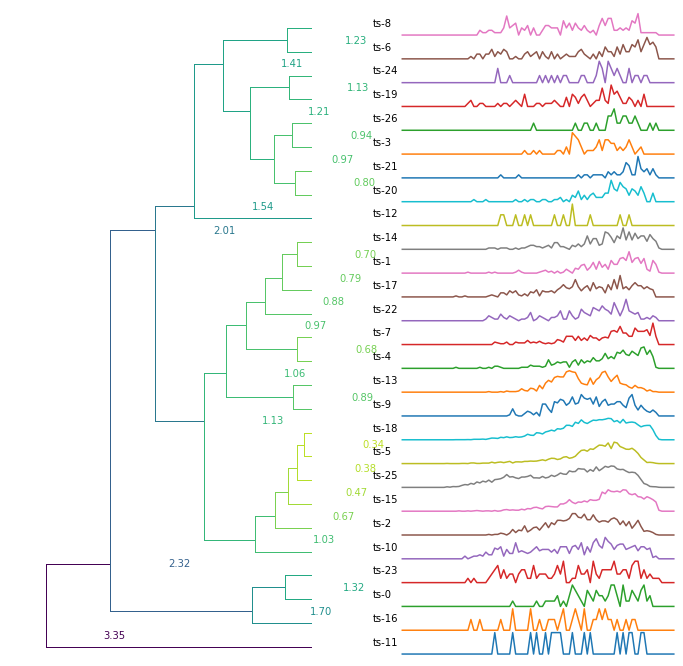

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
show_ts_label = lambda idx: "ts-" + str(idx)
model1.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

In [16]:
# Clustering
model2 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx2 = model2.fit(clustering_array_np)

 96%|█████████▋| 26/27 [00:00<00:00, 11240.15it/s]


In [19]:
cluster_idx1

{0: {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26}}

In [ ]:
# Augment Hierarchical object to keep track of the full tree
model3 = clustering.HierarchicalTree(model2)
cluster_idx3 = model3.fit(clustering_array_np)

In [ ]:
cluster_idx2

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)